<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-11-12 12:49:53.270908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/15760811380_4d686c892b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3506866918_61dd5fc53b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/16121105382_b96251e506_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/4229503616_9b8a42123c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2513618768_ff7c004796_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/295257304_de893fc94d.jpg'),
 PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3407482427_49d5c75291_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15184419268_7230e9728e.jpg'),
 PosixPath('datasets/flower_photos/roses/505517255_cfbb6f6394.jpg')]

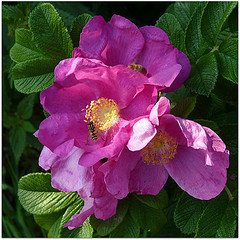

In [8]:
PIL.Image.open(str(roses[1]))

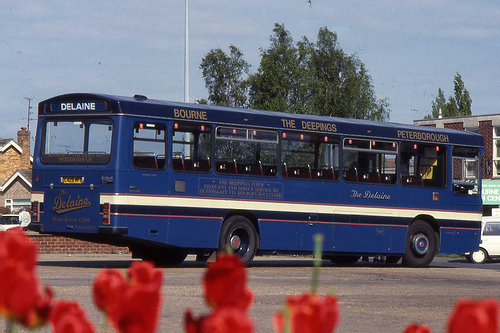

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/295257304_de893fc94d.jpg'),
 PosixPath('datasets/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3407482427_49d5c75291_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15184419268_7230e9728e.jpg'),
 PosixPath('datasets/flower_photos/roses/505517255_cfbb6f6394.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/295257304_de893fc94d.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(375, 500, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

2023-11-12 12:38:16.113255: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 12:38:16.131961: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 12:38:16.132022: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 12:38:16.132790: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 12:38:16.132867: I tensorflow/compiler/xla/stream_executo

Epoch 1/30


2023-11-12 12:38:18.927160: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18.928439: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18.933523: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18.934435: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18.935367: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18.935992: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18.936551: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18.936968: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18.963568: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:18

86/86 [==============================] - 6s 34ms/step - loss: 1.4974 - accuracy: 0.3517
Epoch 2/30
 5/86 [>.............................] - ETA: 2s - loss: 1.1339 - accuracy: 0.4750

2023-11-12 12:38:25.373713: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:25.374350: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:25.374817: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:38:25.376710: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


86/86 [==============================] - 3s 34ms/step - loss: 1.0365 - accuracy: 0.5759
Epoch 3/30
86/86 [==============================] - 3s 34ms/step - loss: 0.8348 - accuracy: 0.6875
Epoch 4/30
86/86 [==============================] - 3s 34ms/step - loss: 0.6455 - accuracy: 0.7638
Epoch 5/30
86/86 [==============================] - 3s 35ms/step - loss: 0.4450 - accuracy: 0.8408
Epoch 6/30
86/86 [==============================] - 3s 35ms/step - loss: 0.2639 - accuracy: 0.9186
Epoch 7/30
86/86 [==============================] - 3s 35ms/step - loss: 0.1507 - accuracy: 0.9578
Epoch 8/30
86/86 [==============================] - 3s 35ms/step - loss: 0.1150 - accuracy: 0.9637
Epoch 9/30
86/86 [==============================] - 3s 35ms/step - loss: 0.0774 - accuracy: 0.9786
Epoch 10/30
86/86 [==============================] - 3s 35ms/step - loss: 0.0696 - accuracy: 0.9789
Epoch 11/30
86/86 [==============================] - 3s 34ms/step - loss: 0.0499 - accuracy: 0.9829
Epoch 12/30
86/86 [

In [22]:
model.evaluate(X_test_scaled,y_test)

2023-11-12 12:40:21.384308: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21.384997: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21.401910: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21.402661: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21.550750: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21.551368: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21.556088: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21.556800: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21.557385: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:21

22/29 [=====================>........] - ETA: 0s - loss: 2.8874 - accuracy: 0.6364

2023-11-12 12:40:21.651729: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


29/29 [==============================] - 0s 8ms/step - loss: 2.9922 - accuracy: 0.6307


[2.9922261238098145, 0.6307189464569092]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [23]:
predictions = model.predict(X_test_scaled)
predictions

2023-11-12 12:40:25.306019: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.398387: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.399620: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


15/29 [==============>...............] - ETA: 0s

2023-11-12 12:40:25.543405: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.544213: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.548556: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.549300: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.549936: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.550592: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.552722: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.555254: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.558375: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25

29/29 [==============================] - 0s 7ms/step


2023-11-12 12:40:25.815153: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.815967: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.822160: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.824218: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.825006: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.826697: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:40:25.830518: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


array([[ 13.477798  ,   5.908025  ,  10.710861  , -22.334015  ,
        -13.479405  ],
       [  1.8484033 ,  -4.249336  ,  -1.901076  ,  10.925845  ,
          1.7238895 ],
       [ -5.3861055 ,   0.91527605,  14.670807  ,  -9.059532  ,
         -5.153268  ],
       ...,
       [  3.1535509 ,  -2.9330502 ,  10.479344  ,  19.476763  ,
          0.6429167 ],
       [  9.743965  ,   3.2384174 ,  -5.814487  ,   1.4984144 ,
         -0.4315801 ],
       [ -1.0926611 ,  -2.9257493 ,   3.1975534 ,  16.358303  ,
          5.627726  ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

2023-11-12 12:40:31.540871: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


In [25]:
np.argmax(score)

0

In [26]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [21]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

2023-11-12 12:50:43.610888: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 12:50:43.629454: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 12:50:43.629513: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 12:50:43.630476: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 12:50:43.630567: I tensorflow/compiler/xla/stream_executo

**Original Image**

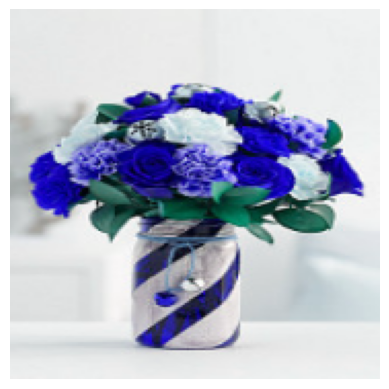

In [22]:
plt.axis('off')
plt.imshow(X[5])

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [22]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

2023-11-12 12:51:22.302605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22.303698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22.304900: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22.306737: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22.309834: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22.312840: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22.315777: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22.316259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22.317592: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:22

Epoch 1/30


2023-11-12 12:51:24.290182: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24.291516: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24.296825: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24.297899: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24.298672: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24.299369: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24.299932: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24.300384: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24.305053: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:24

86/86 [==============================] - 8s 51ms/step - loss: 1.4439 - accuracy: 0.3605
Epoch 2/30
 3/86 [>.............................] - ETA: 4s - loss: 1.2453 - accuracy: 0.4583

2023-11-12 12:51:32.340242: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:32.340840: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:32.341298: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:51:32.343072: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


86/86 [==============================] - 4s 51ms/step - loss: 1.1310 - accuracy: 0.5316
Epoch 3/30
86/86 [==============================] - 4s 50ms/step - loss: 0.9998 - accuracy: 0.5985
Epoch 4/30
86/86 [==============================] - 4s 50ms/step - loss: 0.9581 - accuracy: 0.6126
Epoch 5/30
86/86 [==============================] - 4s 50ms/step - loss: 0.8769 - accuracy: 0.6544
Epoch 6/30
86/86 [==============================] - 4s 50ms/step - loss: 0.8513 - accuracy: 0.6653
Epoch 7/30
86/86 [==============================] - 4s 51ms/step - loss: 0.7982 - accuracy: 0.6955
Epoch 8/30
86/86 [==============================] - 4s 51ms/step - loss: 0.7576 - accuracy: 0.7122
Epoch 9/30
86/86 [==============================] - 4s 51ms/step - loss: 0.7223 - accuracy: 0.7217
Epoch 10/30
86/86 [==============================] - 4s 51ms/step - loss: 0.6889 - accuracy: 0.7380
Epoch 11/30
86/86 [==============================] - 4s 51ms/step - loss: 0.6741 - accuracy: 0.7380
Epoch 12/30
86/86 [

In [23]:
model.evaluate(X_test_scaled,y_test)

2023-11-12 12:54:53.335530: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53.336194: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53.345411: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53.346157: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53.486716: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53.487333: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53.491978: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53.492675: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53.493255: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2023-11-12 12:54:53

22/29 [=====================>........] - ETA: 0s - loss: 0.9596 - accuracy: 0.7216

2023-11-12 12:54:53.607875: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


29/29 [==============================] - 0s 8ms/step - loss: 0.9499 - accuracy: 0.7288


[0.9499319791793823, 0.7287581562995911]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**